![](imgs/dsa_ch02binsearch.jpg)

# 1. $BinarySearch()$ - *Exercises*
## 1.1 $LinearSearch()$: `n_steps` of `orderd_array`: 
How many steps perform a linear search for the number 8 in the ordered array `[2, 4, 6, 8, 10, 12, 13]`?

## 1.2 $BinarySearch()$: `n_steps` of `orderd_array`: 
How many steps would binary search take for the previous example?

## 1.3 $BinarySearch()$: `max_n_steps` of `orderd_array`: 
What is the maximum number of steps it would take to perform a binary search on an array of size 100,000?

# 2. $BinarySearch()$ - *Tony's Solutions*
## 2.1 $LinearSearch()$: `n_steps` of `orderd_array`: 
* How many steps perform a linear search for the number 8 in the ordered array `[2, 4, 6, 8, 10, 12, 13]`?

## 2.1.1 Written Answer
* Count up from index `0` through array to find the `target`. 
* It's the 3rd index, or 4th item, therefore 4 steps.

## 2.1.2 Python Answer

In [2]:
def calc_linear_search_n_steps(input_arr, target):
    print(rf"LinearSearch() began on array: {input_arr}")
    counter = 0
    for i,v in enumerate(input_arr):
        counter += 1
        if input_arr[i] == target:
            print(rf"Target found [{target}]: [{counter}] steps")
            return counter
    print(rf"Target not found in [{input_arr}]")
    return False
linear_search_n_steps = calc_linear_search_n_steps([2, 4, 6, 8, 10, 12, 13], 8)


LinearSearch() began on array: [2, 4, 6, 8, 10, 12, 13]
Target found [8]: [4] steps


## 2.2 $BinarySearch()$: `n_steps` of `orderd_array`: 
How many steps would binary search take for the previous example?

## 2.2.1 Written Answer
Choose middle index and compare against target, here it is 1 step.

## 2.2.2 Python Answer


In [3]:
def calc_binary_search_n_steps(input_arr, target):
    print(rf"BinarySearch() began on array: {input_arr}")

    l,r = 0, len(input_arr)-1 # set left, right index bounds
    counter = 0
    while l<=r:
        counter+=1
        m=(l+r)//2 # middle-index
        if input_arr[m] == target:
            print(rf"Target found [{target}]: [{counter}] steps")
            return counter
        elif input_arr[m] < target:
            l=m+1
        elif input_arr[m] > target:
            r=m-1
    print(rf"Target not found in [{input_arr}]")
    return False
calc_binary_search_n_steps([2, 4, 6, 8, 10, 12, 13], 8)
    

BinarySearch() began on array: [2, 4, 6, 8, 10, 12, 13]
Target found [8]: [1] steps


1

## 2.2.3 Middle Index: `m` - Some Comments
I did not fully understand how the middle-index `m` is calculated despite it looking very easy:

* `m=(l+r)//2`

## 2.2.4 Middle-Index `m` Table
So, I created a table showing:
* left and right-indices (like the algorithm) 
* middle-index calculation before rounding down
* middle-index calculation after rounding down

I didnt have an intuition on how it increments, so for me its fascinating that it increments by 2 each time.... Some math thing going on which I dont understand but at least I know how it works a bit more after this table

**Top Table**: Calculates `m` with rounding down (as in algorithm):    

* `m = (l+r)//2`
* i.e. the middle index chosen to compare against the target

**Bottom Table**: Calculates `m` with no rounding:    
* `m = (l+r)/2`
* Notice the pre-rounded value increments is by 0.5
* And we dont have **non-integer** indexing so this forces us to round up or down, 
* So by rounding down, we see `m` goes up every 2 indices, pretty cool and also makes sense.

![](imgs/dsa_ch02mid_idx.png)

## 2.3 $BinarySearch()$: `max_n_steps` of `orderd_array`: 
What is the maximum number of steps it would take to perform a binary search on an array of size 100,000?

## 2.3.1 Written Answer
A characteristic of the $BinarySearch()$ is that: 

* The number of items (`array_size`) *searchable* **doubles** at each $step$:
    - can be described by an **exponential function** 
    - with **base of 2** 
    - where `n` is the number of steps: 

Defined as: $$array\_size = 2^n$$

That is, the questions is asking:
$$100,000 = 2^n$$
$$\log(100,000) = \log(2^n)$$
$$\log(100,000) = n\log(2)$$
$$\frac{\log(100,000)}{\log(2)} = n$$
$$n=\frac{\log(100,000)}{\log(2)}$$
$$n=16.610\ steps(3\ d.p)$$


In [4]:
def calc_bin_search_nsteps(arr_size: int):
    import numpy as np
    # 2^n_steps = arr_size
    # log (2^n_steps) = log (arr_size)
    # (n_steps) * log (2) = log (arr_size)
    # (n_steps)  = log (arr_size)/log(2)
    # (n_steps)  = log (arr_size)/log(2)
    # (n_steps  = log (100_000)/log(2)
    return np.log(arr_size)/np.log(2)

bin_search_nsteps = calc_bin_search_nsteps(100_000)
bin_search_nsteps

np.float64(16.609640474436812)

## 2.3.2 Python Answer

[ 0.          0.5483871   1.09677419  1.64516129  2.19354839  2.74193548
  3.29032258  3.83870968  4.38709677  4.93548387  5.48387097  6.03225806
  6.58064516  7.12903226  7.67741935  8.22580645  8.77419355  9.32258065
  9.87096774 10.41935484 10.96774194 11.51612903 12.06451613 12.61290323
 13.16129032 13.70967742 14.25806452 14.80645161 15.35483871 15.90322581
 16.4516129  17.        ]


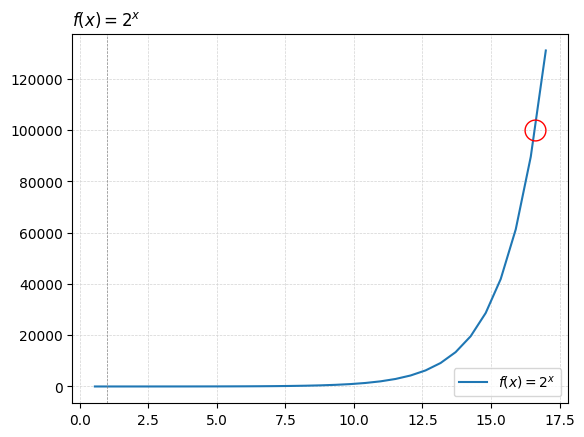

In [6]:
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### x-values ###
xpt = 1
x_deviation = 16
x_no_of_increments = 32
xs_min = xpt - x_deviation
xs_max = xpt + x_deviation
# xs = np.linspace(xs_min, xs_max, x_increments)  # XS
xs = np.linspace(0, xs_max, x_no_of_increments)  # XS
print(xs)
### exclude x-values ### (eg f(x!=0)=1/x, f(x>0)=log(x))
# xs = xs[xs != 1]
xs = xs[xs > 0]

### the function ###
# lbl_fx = r'$f(x)= 6.1t^{2}-9.28t+16.43$'   # LABEL
# lbl_fx = r'$f(x)= log(x)$'   # LABEL
# fx_fx = lambda x: np.log(x)  # f(x)

# ### y-values ###
# ys_fx = fx_fx(xs)            # ys=f(xs)
# ypt_fx = fx_fx(xpt)
# print(f"ypt_fx_at_P(x={xpt}): {ypt_fx}")

### other plots ###
lbl_fx2 = r'$f(x)=2^x$'
fx_fx2 = lambda x: 2**x
ys_fx2 = fx_fx2(xs)

### derivative ###
# lbl_dydx = r"$f'(x)=6s(x={xpt_dydx}): {dydx}")

### tangent ###
# c_tangent = ypt_fx-(dydx)*(xpt)
# tgt = "tangent"
# lbl_tangent = rf'$f_t(x)={dydx:,.1f}t+{c_ta
# ngent:,.1f}$ (tangent at x={xpt})'
# fx_tangent = lambda x: dydx*xs+c_tangent
# ys_tangent = fx_tangent(xs)

### plot things ####
# plt.plot(xs, ys_fx,  'o', markersize=1, label=lbl_fx)
plt.plot(xs, ys_fx2,  '-', markersize=1, label=lbl_fx2)
# plt.plot(xs, ys_fx,  'r^-', linewidth=2, markersize=1, label=lbl_fx)
# plt.scatter(xs, ys_fx, marker="o")
# plt.scatter(x=xpt, y=fx_fx(xpt), marker="o")
# plt.plot(xs, ys_tangent,      'yo-', linewidth=2, markersize=6, label=lbl_tangent)
# plt.plot(xs, ys_fx2,      'bo-', linewidth=2, markersize=8, label=lbl_fx2)

##### EXTRAS: title, grid, legend, zooming, ticks, hline, vline, tickers #####

# title
# plot_title = lbl_fx
plot_title = lbl_fx2
plt.title(plot_title, loc='left')
# plot_title = lbl_fx + f" & it's tangent at x={xpt}"
# plot_title = lbl_fx + "at (4,2)"
# plot_title = lbl_fx2 + " and " + lbl_fx2 + "at (3,3)"
# plot_title = lbl_fx + " and " + lbl_tangent + "at (4,2)"

# grid 
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

# legend plt.legend(loc='upper right')
plt.legend(loc='lower right')

# zoom! enhance! #
# zoom_inc = 20
# plt.xlim(xpt-zoom_inc,xpt+zoom_inc)  # x-rng
# plt.ylim(-0.1, 0.1)  # y-rng

# vertical, horizontal, 
ax = plt.gca()  # Get the current axis
ax.axvline(x=xpt, color='grey', linestyle='--', linewidth=0.5)
# ax.axhline(y=fx_fx(xpt), color='grey', linestyle='--', linewidth=0.5)

# ax.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
# ax.axhline(y=fx_fx(xpt), color='grey', linestyle='--', linewidth=0.5)
# ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)

# X-LIMIT & VALUE
# plt.vlines(x_at_c,linestyles="dotted", ymin=plt.ylim()[0], ymax=max(ys)) # non-monotonic
plt.plot(bin_search_nsteps, 100_000,marker="o",markersize=15, markerfacecolor='none', markeredgecolor='red')

# OTHER
# b+-- , o:b , r^ , bo    plt.xlabel("") 
# plt.ylim(bottom=0)  # chart starts from y=0
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(20000)) # minor ticks
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(2)) # minor ticks
# ref: https://matplotlib.org/stable/users/explain/axes/axes_ticks.html



ypt_fx_at_P(x=0): -inf


/tmp/ipykernel_88674/3373503024.py:22: RuntimeWarning: divide by zero encountered in log
  fx_fx = lambda x: np.log(x)  # f(x)


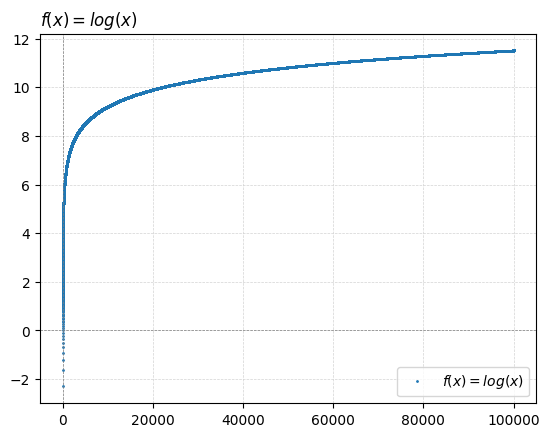

In [21]:
# from matplotlib.ticker import MaxNLocator
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# ### x-values ###
# xpt = 0
# x_deviation = 100_000
# x_no_of_increments = 1_000_000
# xs_min = xpt - x_deviation
# xs_max = xpt + x_deviation
# # xs = np.linspace(xs_min, xs_max, x_increments)  # XS
# xs = np.linspace(0, xs_max, x_no_of_increments)  # XS

# ### exclude x-values ### (eg f(x!=0)=1/x, f(x>0)=log(x))
# # xs = xs[xs != 1]
# xs = xs[xs > 0]

# ### the function ###
# # lbl_fx = r'$f(x)= 6.1t^{2}-9.28t+16.43$'   # LABEL
# lbl_fx = r'$f(x)= log(x)$'   # LABEL
# fx_fx = lambda x: np.log(x)  # f(x)

# ### y-values ###
# ys_fx = fx_fx(xs)            # ys=f(xs)
# ypt_fx = fx_fx(xpt)
# print(f"ypt_fx_at_P(x={xpt}): {ypt_fx}")

# ### other plots ###
# # lbl_fx2 = r'$f(x)=2^x$'
# # fx_fx2 = lambda x: 2**x
# # ys_fx2 = fx_fx2(xs)

# ### derivative ###
# # lbl_dydx = r"$f'(x)=6s(x={xpt_dydx}): {dydx}")

# ### tangent ###
# # c_tangent = ypt_fx-(dydx)*(xpt)
# # tgt = "tangent"
# # lbl_tangent = rf'$f_t(x)={dydx:,.1f}t+{c_ta
# # ngent:,.1f}$ (tangent at x={xpt})'
# # fx_tangent = lambda x: dydx*xs+c_tangent
# # ys_tangent = fx_tangent(xs)

# ### plot things ####
# # plt.plot(xs, ys_fx,  'r^-', linewidth=2, markersize=1, label=lbl_fx)
# plt.plot(xs, ys_fx,  'o', markersize=1, label=lbl_fx)
# # plt.plot(xs, ys_fx2,  '-', markersize=1, label=lbl_fx2)
# # plt.scatter(xs, ys_fx, marker="o")
# # plt.scatter(x=xpt, y=fx_fx(xpt), marker="o")
# # plt.plot(xs, ys_tangent,      'yo-', linewidth=2, markersize=6, label=lbl_tangent)
# # plt.plot(xs, ys_fx2,      'bo-', linewidth=2, markersize=8, label=lbl_fx2)

# ##### EXTRAS: title, grid, legend, zooming, ticks, hline, vline, tickers #####

# # title
# plot_title = lbl_fx
# plt.title(plot_title, loc='left')
# # plot_title = lbl_fx + f" & it's tangent at x={xpt}"
# # plot_title = lbl_fx + "at (4,2)"
# # plot_title = lbl_fx2 + " and " + lbl_fx2 + "at (3,3)"
# # plot_title = lbl_fx + " and " + lbl_tangent + "at (4,2)"

# # grid 
# plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

# # legend plt.legend(loc='upper right')
# plt.legend(loc='lower right')

# # zoom! enhance! #
# zoom_inc = 5
# # plt.xlim(xpt-zoom_inc,xpt+zoom_inc)  # x-rng
# # plt.ylim(-0.1, 0.1)  # y-rng

# # vertical, horizontal, 
# ax = plt.gca()  # Get the current axis
# ax.axvline(x=xpt, color='grey', linestyle='--', linewidth=0.5)
# ax.axhline(y=fx_fx(xpt), color='grey', linestyle='--', linewidth=0.5)

# # ax.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
# # ax.axhline(y=fx_fx(xpt), color='grey', linestyle='--', linewidth=0.5)
# ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)

# # X-LIMIT & VALUE
# # plt.vlines(x_at_c,linestyles="dotted", ymin=plt.ylim()[0], ymax=max(ys)) # non-monotonic
# # plt.plot(x_at_c, 0.5,marker="o",markersize=15, markerfacecolor='none', markeredgecolor='red')

# # OTHER
# # b+-- , o:b , r^ , bo    plt.xlabel("") 
# # plt.ylim(bottom=0)  # chart starts from y=0
# # ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.000025)) # minor ticks
# # ref: https://matplotlib.org/stable/users/explain/axes/axes_ticks.html
